In [47]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sys
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from statistics import mode
from scipy.stats import mode
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [58]:
def clustering_info(real, pred, k_arr):
    pred_clusters = np.zeros_like(pred)
    for i in range(len(k_arr)):
        mask = (pred == k_arr[i])
        pred_clusters[mask] = mode(real[mask])[0]

    print("accuracy:", metrics.fowlkes_mallows_score(real, pred_clusters))
    print("confusion matrix:")
    conf_data = confusion_matrix(real, pred_clusters, labels=k_arr)
    sns.heatmap(conf_data, cmap='Blues',annot=True, linewidths=0, fmt='g', xticklabels=k_arr, yticklabels=k_arr)
    plt.title('White Wine Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [40]:
np.set_printoptions(threshold=sys.maxsize)
raw_white = pd.read_csv('winequality-white.csv', ";")

data_white = np.array(raw_white)
np.random.shuffle(data_white)

rows_white, cols_white = np.shape(data_white)
fit_len_white = (int)(rows_white * 0.8)
unique_white = sorted(list(dict.fromkeys(data_white[:,-1])), key = lambda x:float(x))
unique_white_len = len(unique_white)

trainX_white = data_white[:fit_len_white-1, :-1]
trainY_white = data_white[:fit_len_white-1, -1]
testX_white = data_white[fit_len_white:, :-1]
testY_white = data_white[fit_len_white:, -1]

C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matpl

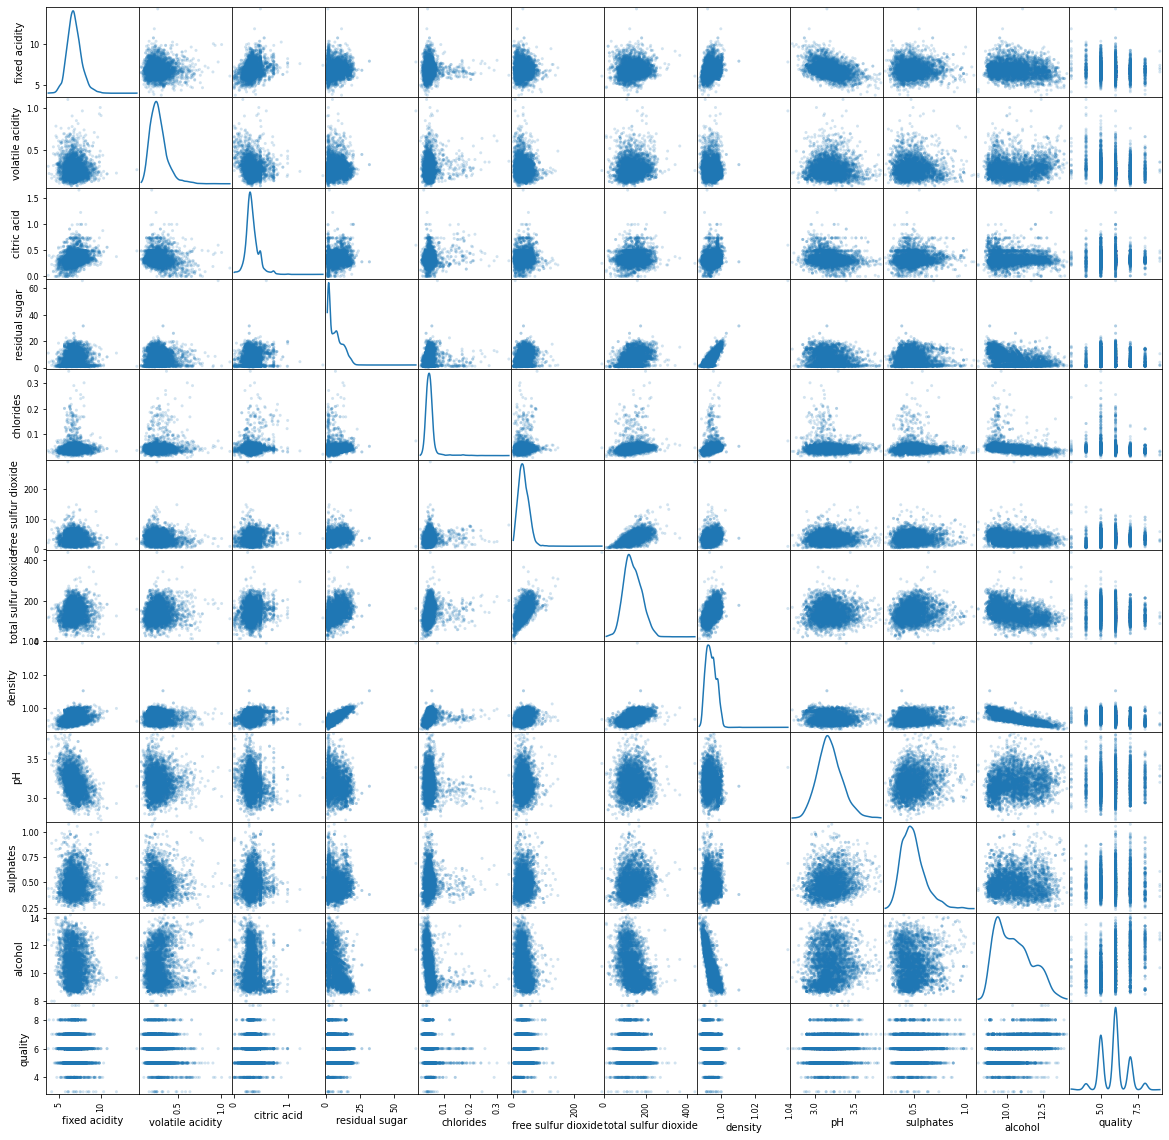

In [41]:
df = pd.DataFrame(data_white, columns=raw_white.columns)
graph = scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')



(1.0, 10.0)

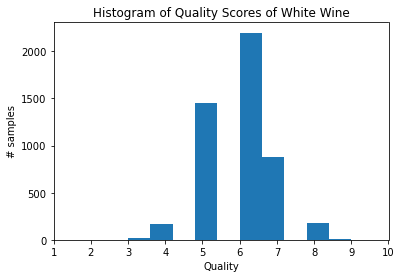

In [62]:
fig,ax=plt.subplots()
plt.hist(data_white[:,-1])
plt.xlabel('Quality')
plt.ylabel('# samples')
plt.title('Histogram of Quality Scores of White Wine')
plt.xlim((1,10))

K Means (sklearn k-means++)
accuracy: 0.391134594690442
confusion matrix:


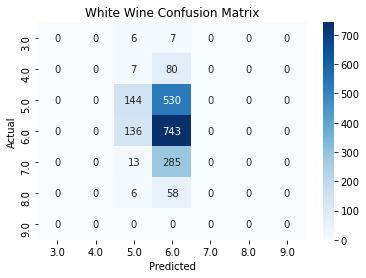

In [63]:
print ("K Means (sklearn k-means++)")
km = KMeans(init='k-means++', n_clusters=unique_white_len, n_init=20).fit_predict(data_white)
clustering_info(data_white[:,-1], km, unique_white)



Vector Machine (sklearn svc linear)
accuracy: 0.49135134196508035
confusion matrix:


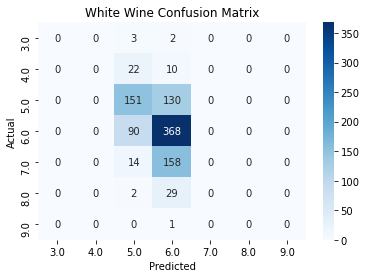

In [60]:
print("Vector Machine (sklearn svc linear)")
vml = make_pipeline(StandardScaler(), SVC(kernel='linear'))
vml.fit(trainX_white, trainY_white)
vmlY = vml.predict(testX_white)
clustering_info(testY_white, vmlY, unique_white)

intercept:  142.41021755078825
coefficients  [ 7.07389087e-02 -1.88787866e+00 -7.67307247e-02  7.74810980e-02
 -4.19145303e-01  4.72753537e-03 -3.75493434e-04 -1.42542313e+02
  6.84552438e-01  7.13762419e-01  1.99724037e-01]
accuracy: 0.5052036505192024
confusion matrix:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          4.09e-272
Time:                        17:09:01   Log-Likelihood:                -4446.1
No. Observations:                3917   AIC:                             8916.
Df Residuals:                    3905   BIC:                             8991.
Df Model:                          11                                         
Covariance Type: 

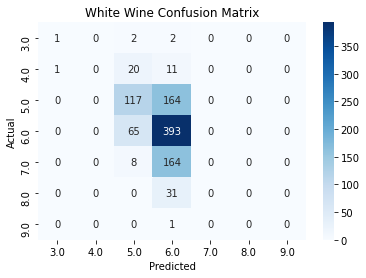

In [61]:
import statsmodels.api as sm
reg = LinearRegression().fit(trainX_white, trainY_white)
print("intercept: ", reg.intercept_)
print("coefficients ", reg.coef_)
regY = np.round(reg.predict(testX_white))
clustering_info(testY_white, regY, unique_white)
X = trainX_white
y = trainY_white
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
plt.scatter(trainX_white[:,10], trainY_white)
m, b = np.polyfit(trainX_white[:,10], trainY_white, 1)
plt.plot(trainX_white[:,10], m * trainX_white[:,10] + b)
plt.ylabel('Quality')
plt.xlabel('Alcohol Content')
plt.title('Alcohol Content vs. Quality')